# Jupyter Slideshow

If you want to generate the presentation you have to launch this command:

* jupyter nbconvert JupyterSlides.ipynb --to slides --post serve

https://rise.readthedocs.io/en/stable/installation.html

Configuration parameters: https://nbconvert.readthedocs.io/en/latest/config_options.html

If you want to use plotly with jupyter slide: https://github.com/plotly/plotly.py/issues/750

## Our Dataset

**Data contains**

- age - age in years 
- sex - (1 = male; 0 = female) 
- cp - chest pain type 
- trestbps - resting blood pressure (in mm Hg on admission to the hospital) 
- chol - serum cholestoral in mg/dl 
- fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
- restecg - resting electrocardiographic results 
- thalach - maximum heart rate achieved 
- exang - exercise induced angina (1 = yes; 0 = no) 
- oldpeak - ST depression induced by exercise relative to rest 
- slope - the slope of the peak exercise ST segment 
- ca - number of major vessels (0-3) colored by flourosopy 
- thal - 3 = normal; 6 = fixed defect; 7 = reversable defect 
- target - have disease or not (1=yes, 0=no)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Read the data
df = pd.read_csv("./data/heart.csv")

In [3]:
#Dataset
print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
print(f"Target values  \n{df.target.value_counts()}")

countNoDisease = len(df[df.target == 0])
countHaveDisease = len(df[df.target == 1])
print("\nPercentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(df.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(df.target))*100)))


Target values  
1    165
0    138
Name: target, dtype: int64

Percentage of Patients Haven't Heart Disease: 45.54%
Percentage of Patients Have Heart Disease: 54.46%


In [20]:
#Male vs Female
import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Bar(name='Male', x=df.sex[df.sex==1], y = [0, df.sex[df.sex==1].count()]),
    go.Bar(name='Female', x=df.sex[df.sex == 0], y = [0, df.sex[df.sex==0].count()])
])
# Change the bar mode

fig.update_layout(barmode='group',autosize=False,width=600,height=600)
fig.show()

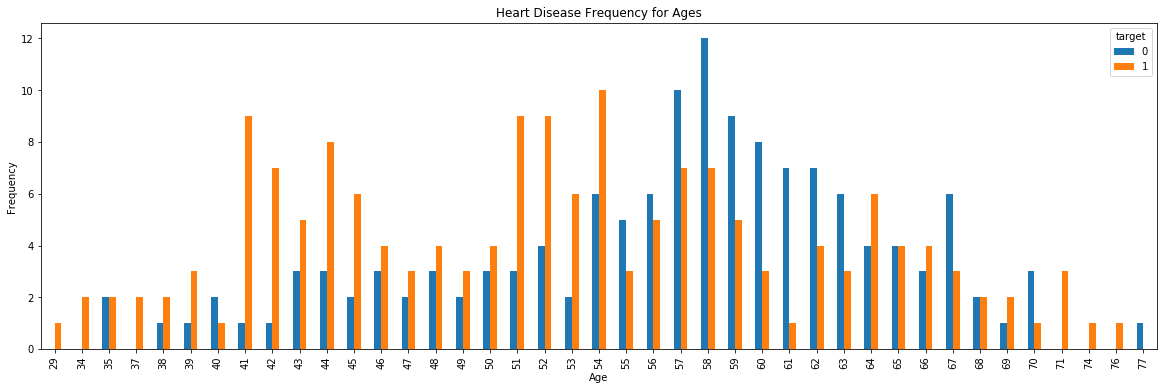

In [11]:
# Age vs Sex Frequency
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()